In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14) # x轴和y轴的字体大小
mpl.rc('xtick', labelsize=12) # 刻度标签字体大小
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# The Normal Equation

In [2]:
import numpy as np
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1) #是从标准正态分布中返回一个或多个样本值。

Saving figure generated_data_plot


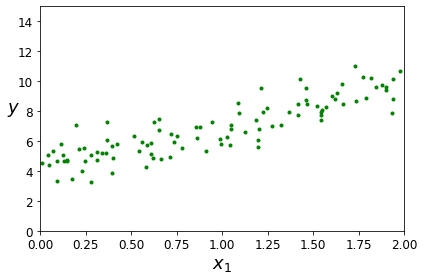

In [3]:
# 根据作者代码练习此部分
plt.plot(X, y, "g.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15]) #[xmin, xmax, ymin, ymax]
save_fig("generated_data_plot")
plt.show()

In [4]:
X_b = np.c_[np.ones((100,1)),X] #设置x0=1
#inv矩阵求逆，dot内积
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] # c_按行（放右边），r_按列（放下边）
X_new_b

array([[1., 0.],
       [1., 2.]])

In [7]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

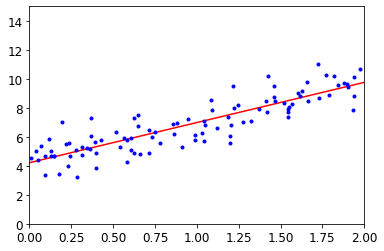

In [8]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

Saving figure linear_model_predictions_plot


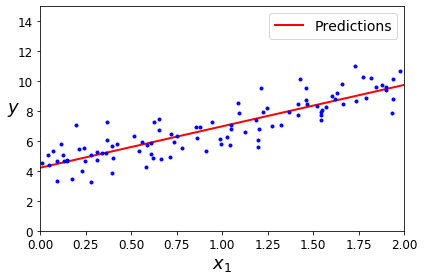

In [9]:
'''
 loc:图例位置，可取(‘best’, ‘upper right’, ‘upper left’, ‘lower left’, 
‘lower right’, ‘right’, ‘center left’, ‘center , right’, ‘lower center’, 
‘upper center’, ‘center’) ；若是使用了bbox_to_anchor，则这项就无效了
'''
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14) # 设置label位置
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_) # 偏置项（intercept_）

[4.21509616]


In [13]:
print(lin_reg.coef_) # 特征权重（coef_）

[[2.77011339]]


In [14]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [15]:
X_new

array([[0],
       [2]])

In [16]:
theta_best_svd,rsiduals,rank,s = np.linalg.lstsq(X_b,y,rcond=1e-6)#最小二乘法
#lstsq的输出包括四部分：回归系数、残差平方和、自变量X的秩、X的奇异值
theta_best_svd  #回归系数

array([[4.21509616],
       [2.77011339]])

In [18]:
np.linalg.pinv(X_b) # 伪逆矩阵 ，符合AXA=A，XAX=X

array([[ 0.0151325 , -0.01578757, -0.00405006,  0.00310531,  0.02685933,
         0.02686063,  0.03211496, -0.01125087,  0.00297349, -0.00276633,
         0.03412733, -0.01681768, -0.00944058,  0.02383693,  0.02547445,
         0.02538969,  0.018905  ,  0.00707123,  0.0120519 ,  0.01960334,
         0.00239724,  0.02774613,  0.01955421,  0.01557138,  0.01075725,
        -0.00690404,  0.02451661,  0.00763588,  0.00344039,  0.03273925,
         0.00262843,  0.02608091,  0.03174103, -0.01568943, -0.01658812,
        -0.00815021,  0.01888506,  0.02999047, -0.001487  ,  0.01161145,
         0.02868287,  0.00865859,  0.03338655, -0.01356618,  0.0213447 ,
        -0.0003219 ,  0.01850419,  0.00732283,  0.00589309,  0.02531188,
        -0.01680023, -0.00636508, -0.0151857 , -0.01278842,  0.00314602,
        -0.01423988,  0.03048309,  0.02471468,  0.03280489,  0.01777332,
         0.01437384,  0.02067019, -0.00924175,  0.01608702,  0.02015579,
         0.0061085 ,  0.02766937, -0.00781747,  0.0

In [20]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

In [21]:
# np.linalg.svd(a,full_matrices=1,compute_uv=1)
# a是一个形如(M,N)矩阵
# full_matrices的取值是为0或者1，默认值为1，这时u的大小为(M,M)，v的大小为(N,N) 。否则u的大小为(M,K)，v的大小为(K,N) ，K=min(M,N)。
# compute_uv的取值是为0或者1，默认值为1，表示计算u,s,v。为0的时候只计算s。
# 总共有三个返回值u,s,v   u大小为(M,M)，s大小为(M,N)，v大小为(N,N)。
# A = u*s*v
# 其中s是对矩阵a的奇异值分解。s除了对角元素不为0，其他元素都为0，并且对角元素从大到小排列。s中有n个奇异值，一般排在后面的比较接近0，所以仅保留比较大的r个奇异值。

# 梯度下降

- 批量梯度下降

In [23]:
eta = 0.1 # 学习率
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients
    if(iteration%100==0):
        print(theta)
print(theta)

[[1.10103284]
 [2.5689581 ]]
[[4.16287994]
 [2.81621747]]
[[4.21344378]
 [2.77157234]]
[[4.21504387]
 [2.77015955]]
[[4.2150945 ]
 [2.77011485]]
[[4.21509611]
 [2.77011343]]
[[4.21509616]
 [2.77011339]]
[[4.21509616]
 [2.77011339]]
[[4.21509616]
 [2.77011339]]
[[4.21509616]
 [2.77011339]]
[[4.21509616]
 [2.77011339]]


In [35]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            if iteration > 0:
                style = "b-"  
            else:
                style = "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


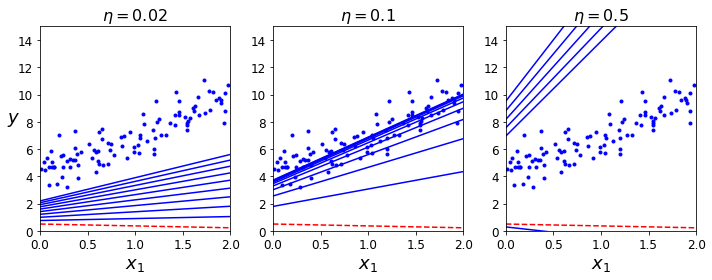

In [36]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

- 批量随机下降

In [44]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [48]:
n_epochs= 50
t0,t1 = 5,50 #学习计划超参数
def learning_schedule(t):
    return t0/(t+t1)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  

In [49]:
theta

array([[4.18545376],
       [2.77900595]])

In [50]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_,sgd_reg.coef_

(array([4.22520079]), array([2.79873691]))

- 小批量梯度下降

In [52]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [53]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


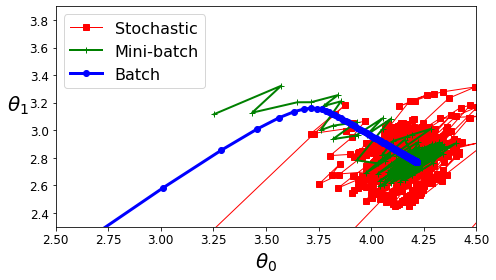

In [54]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()